<a href="https://colab.research.google.com/github/SamiraHabib/Movies_University/blob/main/Faculdade_provadepython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Faculdade Cesgranrio
###Aluna: Samira Habib da Silva


####**Análise do dataset de Filmes e suas notas de avaliação**
****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from collections import Counter

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/SamiraHabib/Movies_University/main/links.csv?token=AR3K7SSIDDD4BKZ2NVFSXPLAY7376")
data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
data.tail()

,movieId,imdbId,tmdbId
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0
9741,193609,101726,37891.0


movieId é um identificador de filmes usado por <https://movielens.org>. Por exemplo, o filme Toy Story tem o link <https://movielens.org/movies/1>.

imdbId é um identificador para filmes usado por <http://www.imdb.com>. Por exemplo, o filme Toy Story tem o link <http://www.imdb.com/title/tt0114709/>.

tmdbId é um identificador de filmes usado por <https://www.themoviedb.org>. Por exemplo, o filme Toy Story tem o link <https://www.themoviedb.org/movie/862>.


#Exploração do dataset links:

In [4]:
data.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [5]:
data.isnull().sum().sort_values(ascending=False)

tmdbId     8
imdbId     0
movieId    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [7]:
data[data.isnull().any(axis=1)]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [8]:
data.shape

(9742, 3)

In [9]:
data.dropna(subset=['tmdbId'], inplace=True)

In [10]:
data.shape

(9734, 3)

###Densidade de valores de moveID

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



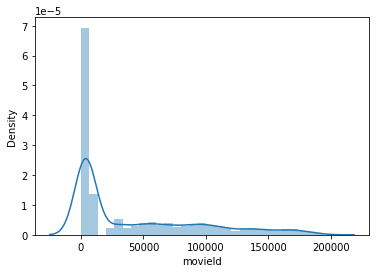

In [11]:
sns.distplot(data['movieId'])

#Movie

In [12]:
data_movie = pd.read_csv("https://raw.githubusercontent.com/SamiraHabib/Movies_University/main/movies.csv?token=AR3K7SVR5BVW6TJ4I6O2JNTAY74EQ")
data_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Lista de Gêneros de filmes:

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

#Exploração do dataset movies e suas classificações:

Os títulos dos filmes são inseridos manualmente ou importados de <https://www.themoviedb.org/> e incluem o ano de lançamento entre parênteses. Erros e inconsistências podem existir nesses títulos.


In [13]:
data_movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [14]:
data_movie.isnull().sum().sort_values(ascending=False)

genres     0
title      0
movieId    0
dtype: int64

In [15]:
data_movie.shape

(9742, 3)

In [16]:
data_movie.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

In [17]:
data_movie.genres.count()

9742

In [18]:
data_movie['genres'].value_counts()

Drama                                    1053
Comedy                                    946
Comedy|Drama                              435
Comedy|Romance                            363
Drama|Romance                             349
                                         ... 
Action|Fantasy|Horror|Sci-Fi|Thriller       1
Adventure|Drama|Thriller|IMAX               1
Action|Comedy|Drama|Horror                  1
Action|Animation|Comedy|Fantasy             1
Animation|Children|Drama|Fantasy|IMAX       1
Name: genres, Length: 951, dtype: int64

In [19]:
data_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
data_movie[data_movie['genres'] == 'Comedy'].count()

movieId    946
title      946
genres     946
dtype: int64

In [21]:
data_movie[data_movie['genres'] == 'Adventure|Animation|Children|Comedy|Fantasy'].count()

movieId    13
title      13
genres     13
dtype: int64

In [22]:
data_movie[data_movie['genres'] == 'Romance'].count()

movieId    21
title      21
genres     21
dtype: int64

In [23]:
data_movie[data_movie['genres'] == 'Fantasy'].count()

movieId    4
title      4
genres     4
dtype: int64

In [24]:
data_movie.groupby("title", sort=False)["genres"].sum()

title
Toy Story (1995)                             Adventure|Animation|Children|Comedy|Fantasy
Jumanji (1995)                                                Adventure|Children|Fantasy
Grumpier Old Men (1995)                                                   Comedy|Romance
Waiting to Exhale (1995)                                            Comedy|Drama|Romance
Father of the Bride Part II (1995)                                                Comedy
                                                                ...                     
Black Butler: Book of the Atlantic (2017)                Action|Animation|Comedy|Fantasy
No Game No Life: Zero (2017)                                    Animation|Comedy|Fantasy
Flint (2017)                                                                       Drama
Bungo Stray Dogs: Dead Apple (2018)                                     Action|Animation
Andrew Dice Clay: Dice Rules (1991)                                               Comedy
Name: genres, L

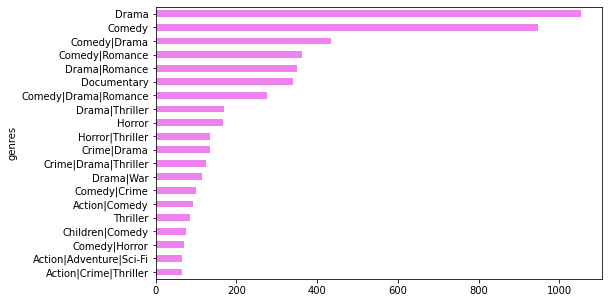

In [25]:
data_movie.groupby(['genres']).genres.count().sort_values()[-20:].plot(kind='barh', color = 'violet', figsize=(8,5))

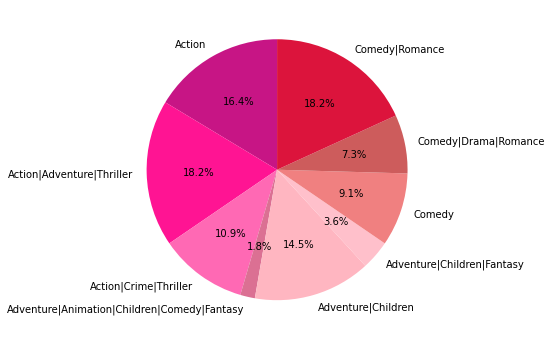

In [61]:
c = ['#C71585', '#FF1493', '#FF69B4', '#DB7093', '#FFB6C1', '#FFC0CB', '#F08080', '#CD5C5C', '#DC143C', '#800000']

soma_movie = data_movie.movieId.groupby(data_movie.genres.head(10)).sum()
fig, ax= plt.subplots(figsize=(6,6), subplot_kw=dict(aspect='equal'))
plt.pie(soma_movie, labels=soma_movie.index, autopct='%1.1f%%', colors = c, startangle=90);
plt.show()

#Rastings

In [27]:
data_rastings = pd.read_csv("https://raw.githubusercontent.com/SamiraHabib/Movies_University/main/ratings.csv?token=AR3K7SRSNF4FMZX2PQLASJDAY74GQ")
data_rastings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


As linhas dentro desse arquivo são ordenadas primeiro por userId e, em seguida, dentro do usuário, por movieId.

As avaliações são feitas em uma escala de 5 estrelas, com incrementos de meia estrela (0,5 estrelas - 5,0 estrelas).

Os carimbos de data / hora representam os segundos desde a meia-noite do Tempo Universal Coordenado (UTC) de 1º de janeiro de 1970.

#Exploração do dataset de avaliação dos filmes:


In [28]:
data_rastings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [29]:
data_rastings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [30]:
data_rastings.isnull().sum().sort_values(ascending=False)

timestamp    0
rating       0
movieId      0
userId       0
dtype: int64

In [31]:
data_rastings.shape

(100836, 4)

In [32]:
data_rastings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [33]:
data_rastings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
data_rastings['timestamp'] = data_rastings['timestamp'].astype(str)

In [35]:
data_rastings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp     object
dtype: object

In [36]:
data_rastings.groupby("movieId", sort=False)['rating'].sum()

movieId
1         843.0
3         169.5
6         402.5
47        807.0
50        864.5
          ...  
160341      2.5
160527      4.5
160836      3.0
163937      3.5
163981      3.5
Name: rating, Length: 9724, dtype: float64

In [64]:
data_nota = data_rastings[data_rastings['rating'] > 3.0]

In [76]:
trace = go.Box(y = data_nota.loc[data_nota['rating'] > 3.0, 'movieId'],
                name = 'Notas acima de 3.0',
                marker = {'color': '#e74c3c'})
data = [trace]
layout = go.Layout(title = 'Dispersão de notas pelos ids de cada filme',
                   titlefont = {'family': 'Arial',
                                'size': 10,
                                'color': '#f39c12'},
                   xaxis = {'title': 'Notas'},
                   yaxis = {'title': 'ID'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [38]:
data_filmes = pd.merge(data_rastings, data_movie, how = 'inner', on = 'movieId')

In [39]:
data_filmes.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


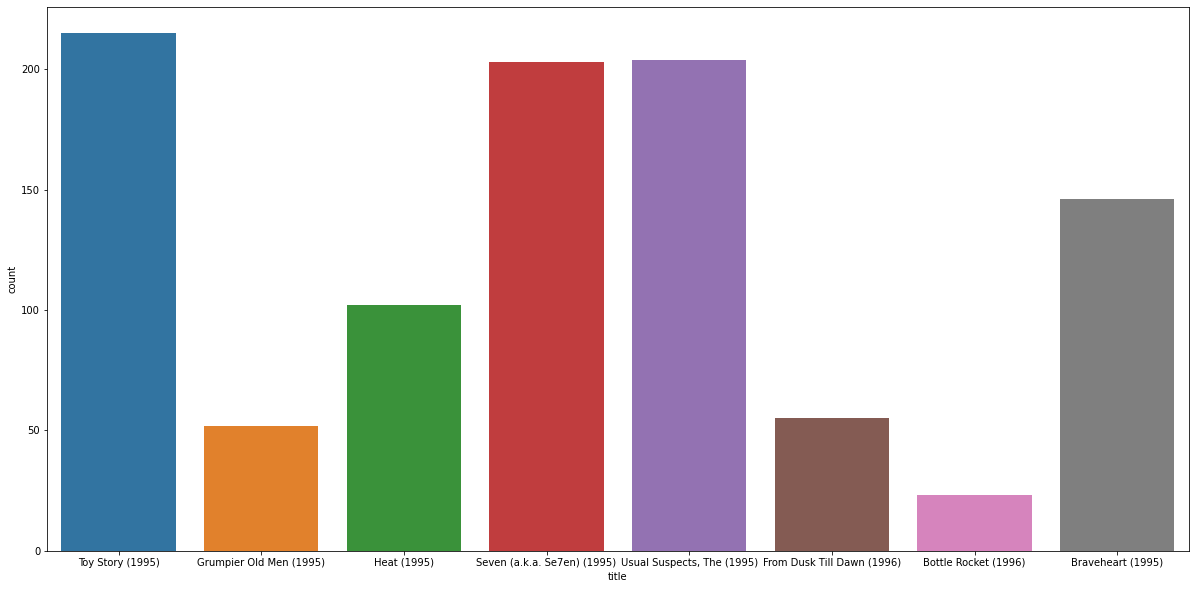

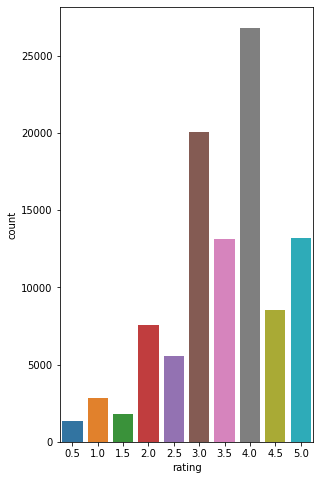

In [40]:
plt.figure(figsize=(45,10))
plt.subplot(1, 2, 1)
sns.countplot(x='title', data=data_filmes[:1000])
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 2)
sns.countplot(x='rating', data=data_filmes)

In [41]:
data_filmes.title.count()

100836

###Correlação entre as colunas do dataframe

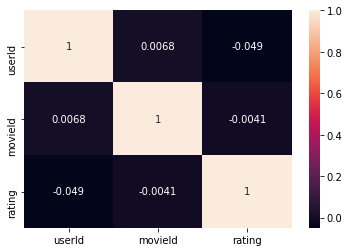

In [42]:
sns.heatmap(data_filmes.corr(), annot=True)

#Tags:

In [43]:
data_tags = pd.read_csv("https://raw.githubusercontent.com/SamiraHabib/Movies_University/main/tags.csv?token=AR3K7SQWZZHTW2SFGNVRAGTAY74IM")
data_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


As linhas dentro desse arquivo são ordenadas primeiro por userId e, em seguida, dentro do usuário, por movieId.

Tags são metadados gerados pelo usuário sobre filmes. Cada tag é normalmente uma única palavra ou frase curta. O significado, o valor e a finalidade de uma tag específica são determinados por cada usuário.

Os carimbos de data / hora representam os segundos desde a meia-noite do Tempo Universal Coordenado (UTC) de 1º de janeiro de 1970.

IDs de usuário
--------

Os usuários do MovieLens foram selecionados aleatoriamente para inclusão. Seus ids foram tornados anônimos. Os ids de usuário são consistentes entre `ratings.csv` e` tags.csv` (ou seja, o mesmo id se refere ao mesmo usuário nos dois arquivos).


Ids de filmes
---------

Apenas filmes com pelo menos uma classificação ou tag são incluídos no conjunto de dados. Esses ids de filme são consistentes com aqueles usados ​​no site MovieLens (por exemplo, id `1` corresponde ao URL <https://movielens.org/movies/1>). Os ids dos filmes são consistentes entre `ratings.csv`,` tags.csv`, `movies.csv` e` links.csv` (ou seja, o mesmo id se refere ao mesmo filme nesses quatro arquivos de dados).



#Exploração do dataset sobre tags (comentários do filme):

In [44]:
data_tags.isnull().sum().sort_values(ascending=False)

timestamp    0
tag          0
movieId      0
userId       0
dtype: int64

In [45]:
data_tags.shape

(3683, 4)

In [46]:
data_tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [47]:
data_tags.value_counts()

userId  movieId  tag                 timestamp 
610     168248   Heroic Bloodshed    1493844270    1
474     948      oil                 1137206938    1
        947      homeless            1137521096    1
                 butler              1137521096    1
        945      Astaire and Rogers  1137181301    1
                                                  ..
        34405    Firefly             1137181624    1
        34359    pregnancy           1138040301    1
        34271    hip hop             1141848751    1
        33660    boxing              1137201602    1
2       60756    Highly quotable     1445714996    1
Length: 3683, dtype: int64

In [48]:
data_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [49]:
data_tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

summary = data_tags.dropna(subset=['tag'], axis=0)['tag']

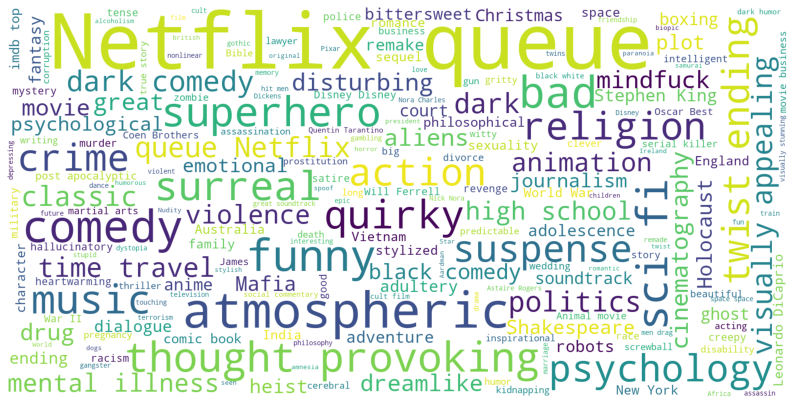

In [51]:
all_summary = " ".join(s for s in summary)

stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(14,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

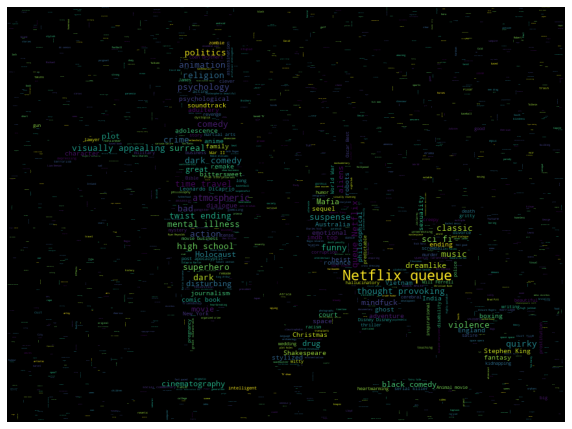

In [53]:
imagem = np.array(Image.open("/content/pequeno_principe.png"))

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=imagem, max_font_size=200,
                      min_font_size=1).generate(all_summary)

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

In [54]:
data_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [55]:
data_tags.tag.unique()

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [56]:
filmes_dict = Counter(data_tags['tag'])
filmes_dict

Counter({'funny': 23,
         'Highly quotable': 3,
         'will ferrell': 4,
         'Boxing story': 1,
         'MMA': 1,
         'Tom Hardy': 2,
         'drugs': 10,
         'Leonardo DiCaprio': 10,
         'Martin Scorsese': 4,
         'way too long': 1,
         'Al Pacino': 5,
         'gangster': 2,
         'mafia': 3,
         'Mafia': 10,
         'holocaust': 2,
         'true story': 4,
         'twist ending': 19,
         'Anthony Hopkins': 1,
         'courtroom drama': 2,
         'britpop': 1,
         'indie record label': 1,
         'music': 16,
         'dumpster diving': 1,
         'Sustainability': 1,
         'romantic comedy': 1,
         'wedding': 6,
         'painter': 1,
         'bloody': 3,
         'black hole': 1,
         'sci-fi': 21,
         'time-travel': 2,
         'fantasy': 6,
         'magic board game': 1,
         'Robin Williams': 3,
         'beautiful scenery': 2,
         'epic': 2,
         'historical': 1,
         'inspirati

In [57]:
df = pd.DataFrame.from_dict(filmes_dict, orient='index')
df.rename(columns={0: 'Count'}, inplace = True)
df.index.name = 'Tags_filmes'
df_count_names = df.nlargest(10, 'Count')

In [58]:
val_num = df_count_names['Count']
val_name = df_count_names.index

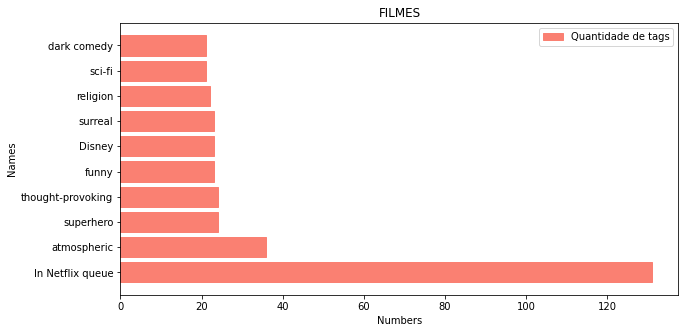

In [59]:
plt.figure(figsize = (10,5))
plt.barh(val_name, val_num, align='center',color='salmon', edgecolor = 'salmon')
plt.legend(labels = ['Quantidade de tags'])
plt.title("FILMES")
plt.xlabel('Numbers')
plt.ylabel('Names')

plt.show()